## Bibliotecas

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Funções

In [2]:
# Função para criar um DataFrame contendo a resposta e seus respectivos lags
def create_lags(p, response):
    df_lags = pd.DataFrame()
    for i in range(p):
        df_lags[f'f(t-{p-i})'] = response.shift(-i)
    X = df_lags[:-p]
    y = response[p:].reset_index(drop=True)
    return pd.concat([X, y], axis=1)  

## Carregamento dos dados

In [3]:
# Carrega o csv em um pandas DataFrame
df_raw = pd.read_csv('../data/variacaoValores.csv')
df_raw

,Amostra,f(t)
0,1,0.1701
1,2,0.1023
2,3,0.4405
3,4,0.3609
4,5,0.7192
...,...,...
115,116,0.4499
116,117,0.2564
117,118,0.7642
118,119,0.1411


In [4]:
# Quantidade de lags -> p = 5
response = df_raw['f(t)']
df_5 = create_lags(5, response)

# Quantidade de lags -> p = 10
df_10 = create_lags(10, response)

# Quantidade de lags -> p = 15
df_15 = create_lags(15, response)

## Pré-Processamento dos dados

In [5]:
df_raw.describe()

,Amostra,f(t)
count,120.000000,120.000000
mean,60.500000,0.330615
std,34.785054,0.224801
min,1.000000,0.000100
25%,30.750000,0.149500
50%,60.500000,0.331550
75%,90.250000,0.445025
max,120.000000,0.800000


Conforme o max e  min em f(t), não precisamos utilizar MinMaxScaler

## TDNN - MLPRegressor

### Rede 1 $\rightarrow$ 05 entradas (p = 05) com N1 = 15

In [6]:
# Divide df_5 em treino e teste
X = df_5.drop('f(t)', axis=1)
y = df_5[['f(t)']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
y_train = y_train.ravel()

In [7]:
# Declara o MLPRegressor com solver SGD
N1 = 15
mlp_reg_1_sgd = MLPRegressor(hidden_layer_sizes=(N1), activation='relu',
                         solver='sgd', max_iter=5_000, tol=.000_001,
                         momentum=.9, early_stopping=True, epsilon=10e-6,
                         learning_rate_init=.001, learning_rate='constant')

In [8]:
# Declara o MLPRegressor com solver Adam
mlp_reg_1_adam = MLPRegressor(hidden_layer_sizes=(N1), activation='relu',
                         solver='adam', max_iter=5_000, tol=.000_001,
                         momentum=.9, early_stopping=True, epsilon=10e-6,
                         learning_rate_init=.001, learning_rate='constant')

In [9]:
# Treinamento do MLPRegressor
mlp_reg_1_sgd.fit(X_train, y_train)
mlp_reg_1_adam.fit(X_train, y_train)

MLPRegressor(early_stopping=True, epsilon=1e-05, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

#### Avaliação Rede 1 com SGD

In [10]:
y_pred = mlp_reg_1_sgd.predict(X_test)
print(f'Épocas: {mlp_reg_1_sgd.n_iter_}')
print(f'Mean Absolute Error (MAE) -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE) -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE) -> {metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'R² Score -> {metrics.r2_score(y_test, y_pred)}')

Épocas: 80
Mean Absolute Error (MAE) -> 0.23182451018168143
Mean Squared Error (MSE) -> 0.08155231314381516
Root Mean Squared Error (RMSE) -> 0.28557365624968833
R² Score -> -0.7328051187106153


#### Avaliação Rede 1 com Adam

In [11]:
y_pred = mlp_reg_1_adam.predict(X_test)
print(f'Épocas: {mlp_reg_1_adam.n_iter_}')
print(f'Mean Absolute Error (MAE) -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE) -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE) -> {metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'R² Score -> {metrics.r2_score(y_test, y_pred)}')

Épocas: 971
Mean Absolute Error (MAE) -> 0.03813812470641228
Mean Squared Error (MSE) -> 0.0018933809405696567
Root Mean Squared Error (RMSE) -> 0.04351299737514823
R² Score -> 0.9597698696822674


### Rede 2 $\rightarrow$ 10 entradas (p = 10) com N1 = 25

In [12]:
# Divide df_10 em treino e teste
X = df_10.drop('f(t)', axis=1)
y = df_10[['f(t)']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
y_train = y_train.ravel()

In [13]:
# Declara o MLPRegressor com solver SGD
N1 = 25
mlp_reg_2_sgd = MLPRegressor(hidden_layer_sizes=(N1), activation='relu',
                         solver='sgd', max_iter=5_000, tol=.000_001,
                         momentum=.9, early_stopping=True, epsilon=10e-6,
                         learning_rate_init=.001, learning_rate='constant')

In [14]:
# Declara o MLPRegressor com solver Adam
mlp_reg_2_adam = MLPRegressor(hidden_layer_sizes=(N1), activation='relu',
                         solver='adam', max_iter=5_000, tol=.000_001,
                         momentum=.9, early_stopping=True, epsilon=10e-6,
                         learning_rate_init=.001, learning_rate='constant')

In [15]:
# Treinamento do MLPRegressor
mlp_reg_2_sgd.fit(X_train, y_train)
mlp_reg_2_adam.fit(X_train, y_train)

MLPRegressor(early_stopping=True, epsilon=1e-05, hidden_layer_sizes=25,
             max_iter=5000, tol=1e-06)

#### Avaliação Rede 2 com SGD

In [16]:
y_pred = mlp_reg_2_sgd.predict(X_test)
print(f'Épocas: {mlp_reg_2_sgd.n_iter_}')
print(f'Mean Absolute Error (MAE) -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE) -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE) -> {metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'R² Score -> {metrics.r2_score(y_test, y_pred)}')

Épocas: 117
Mean Absolute Error (MAE) -> 0.2280982435088385
Mean Squared Error (MSE) -> 0.0756440255190829
Root Mean Squared Error (RMSE) -> 0.27503458967752203
R² Score -> -0.3446810555993527


#### Avaliação Rede 2 com Adam

In [17]:
y_pred = mlp_reg_2_adam.predict(X_test)
print(f'Épocas: {mlp_reg_2_adam.n_iter_}')
print(f'Mean Absolute Error (MAE) -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE) -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE) -> {metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'R² Score -> {metrics.r2_score(y_test, y_pred)}')

Épocas: 1625
Mean Absolute Error (MAE) -> 0.015327117084313271
Mean Squared Error (MSE) -> 0.00041867180566335766
Root Mean Squared Error (RMSE) -> 0.020461471248748406
R² Score -> 0.9925575081214171


### Rede 3 $\rightarrow$ 15 entradas (p = 15) com N1 = 50

In [18]:
# Divide df_15 em treino e teste
X = df_15.drop('f(t)', axis=1)
y = df_15[['f(t)']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
y_train = y_train.ravel()

In [19]:
# Declara o MLPRegressor com solver SGD
N1 = 50
mlp_reg_3_sgd = MLPRegressor(hidden_layer_sizes=(N1), activation='relu',
                         solver='sgd', max_iter=5_000, tol=.000_001,
                         momentum=.9, early_stopping=True, epsilon=10e-6,
                         learning_rate_init=.001, learning_rate='constant')

In [20]:
# Declara o MLPRegressor com solver Adam
mlp_reg_3_adam = MLPRegressor(hidden_layer_sizes=(N1), activation='relu',
                         solver='adam', max_iter=5_000, tol=.000_001,
                         momentum=.9, early_stopping=True, epsilon=10e-6,
                         learning_rate_init=.001, learning_rate='constant')

In [21]:
# Treinamento do MLPRegressor
mlp_reg_3_sgd.fit(X_train, y_train)
mlp_reg_3_adam.fit(X_train, y_train)

MLPRegressor(early_stopping=True, epsilon=1e-05, hidden_layer_sizes=50,
             max_iter=5000, tol=1e-06)

#### Avaliação Rede 3 com SGD

In [22]:
y_pred = mlp_reg_3_sgd.predict(X_test)
print(f'Épocas: {mlp_reg_3_sgd.n_iter_}')
print(f'Mean Absolute Error (MAE) -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE) -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE) -> {metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'R² Score -> {metrics.r2_score(y_test, y_pred)}')

Épocas: 37
Mean Absolute Error (MAE) -> 0.22307527754263132
Mean Squared Error (MSE) -> 0.08817684478460945
Root Mean Squared Error (RMSE) -> 0.2969458617064893
R² Score -> -0.5205554932825935


#### Avaliação Rede 3 com Adam

In [23]:
y_pred = mlp_reg_3_adam.predict(X_test)
print(f'Épocas: {mlp_reg_3_adam.n_iter_}')
print(f'Mean Absolute Error (MAE) -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE) -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE) -> {metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'R² Score -> {metrics.r2_score(y_test, y_pred)}')

Épocas: 2662
Mean Absolute Error (MAE) -> 0.01544732233568347
Mean Squared Error (MSE) -> 0.0007893907128533127
Root Mean Squared Error (RMSE) -> 0.02809609782253245
R² Score -> 0.9863874423301562


Executar 3 treinamentos para cada rede perceptron escolhendo a melhor configuração do solver observado, inicializando-se as matrizes de pesos sinápticos em cada treinamento com valores aleatórios, ou seja, não uitilizar o random_state.

Para todos os treinamentos efetuados, fazer então a validação da rede em relação aos valores desejados apresentados na tabela abaixo. Forncer para cada treinamento o Erro Absoluto Médio (MAE) entre os valores desejados e os valores fornecidos pela rede em relação a todas as amostras de teste. Obtenha também o respectivo Erro Quadrático Médio (MSE) e o R2 Score.

In [66]:
df_20 = create_lags(20, df_raw['f(t)'])
X_20 = df_20.drop('f(t)', axis=1)
y_20 = df_20[['f(t)']].values
X_train, X_test, y_train, y_test = train_test_split(X_20, y_20, test_size=.3)
X_validacao = X_20[-20:]
y_validacao = df_raw[['f(t)']].values[-20:].ravel()


df_new = pd.DataFrame()
for i in range(1, 4):
    mlp_reg_1_adam.fit(X_train, y_train)
    mlp_reg_2_adam.fit(X_train, y_train)
    mlp_reg_3_adam.fit(X_train, y_train)

    y_pred1 = mlp_reg_1_adam.predict(X_validacao)
    y_pred2 = mlp_reg_2_adam.predict(X_validacao)
    y_pred3 = mlp_reg_3_adam.predict(X_validacao)

    mae_1 = metrics.mean_absolute_error(y_validacao, y_pred1)
    mae_2 = metrics.mean_absolute_error(y_validacao, y_pred2)
    mae_3 = metrics.mean_absolute_error(y_validacao, y_pred3)

    rmse_1 = metrics.root_mean_squared_error(y_validacao, y_pred1)
    rmse_2 = metrics.root_mean_squared_error(y_validacao, y_pred2)
    rmse_3 = metrics.root_mean_squared_error(y_validacao, y_pred3)

    r2_score_1 = metrics.r2_score(y_validacao, y_pred1)
    r2_score_2 = metrics.r2_score(y_validacao, y_pred2)
    r2_score_3 = metrics.r2_score(y_validacao, y_pred3)

    df_new[f'T{i}R1'] = y_pred1
    df_new[f'T{i}R2'] = y_pred2
    df_new[f'T{i}R3'] = y_pred1

    print(f'\nTreino {i}')
    print(f'__________________________________________')
    print(f'MAE Rede 1: {metrics.mean_absolute_error(y_pred1, y_validacao)}')
    print(f'RMSE Rede 1: {metrics.root_mean_squared_error(y_pred1, y_validacao)}')
    print(f'R² Rede 1: {metrics.r2_score(y_pred1, y_validacao)}')
    print(f'MAE Rede 2: {metrics.mean_absolute_error(y_pred2, y_validacao)}')
    print(f'RMSE Rede 2: {metrics.root_mean_squared_error(y_pred2, y_validacao)}')
    print(f'R² Rede 2: {metrics.r2_score(y_pred2, y_validacao)}')
    print(f'MAE Rede 3: {metrics.mean_absolute_error(y_pred3, y_validacao)}')
    print(f'RMSE Rede 3: {metrics.root_mean_squared_error(y_pred3, y_validacao)}')
    print(f'R² Rede 3: {metrics.r2_score(y_pred3, y_validacao)}')

df_new = df_new[['T1R1', 'T2R1', 'T3R1',
                 'T1R2', 'T2R2', 'T3R2',
                 'T1R3', 'T2R3', 'T3R3']]
    
df_new['f(t)'] = y_validacao

e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Treino 1
__________________________________________
MAE Rede 1: 0.04976313818289463
RMSE Rede 1: 0.062476434051510585
R² Rede 1: 0.8984663941095575
MAE Rede 2: 0.20862950658366902
RMSE Rede 2: 0.251715901634281
R² Rede 2: -1.0293065483173707
MAE Rede 3: 0.0037153931659180154
RMSE Rede 3: 0.005355711351450159
R² Rede 3: 0.9993257339833412


e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_netwo


Treino 2
__________________________________________
MAE Rede 1: 0.1574342842423994
RMSE Rede 1: 0.18930475919739667
R² Rede 1: 0.05793688896882776
MAE Rede 2: 0.010604102843050685
RMSE Rede 2: 0.01455406109596317
R² Rede 2: 0.9950747386972432
MAE Rede 3: 0.18820705967248155
RMSE Rede 3: 0.21518769806105206
R² Rede 3: -2.3616408372891926

Treino 3
__________________________________________
MAE Rede 1: 0.008360464507400744
RMSE Rede 1: 0.010525089890681964
R² Rede 1: 0.9974129482741395
MAE Rede 2: 0.029708140274047647
RMSE Rede 2: 0.03552443234903594
R² Rede 2: 0.9715252056952637
MAE Rede 3: 0.19271499635915984
RMSE Rede 3: 0.22820720577719422
R² Rede 3: -6.411835247807548


e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\workspace\ciencia-dados\TDNN_price\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
df_new

,T1R1,T2R1,T3R1,T1R2,T2R2,T3R2,T1R3,T2R3,T3R3,f(t)
0,0.420543,0.231885,0.415543,0.176577,0.417905,0.441629,0.420543,0.231885,0.415543,0.4173
1,-0.062017,-0.242423,0.001391,0.312108,0.000752,-0.039142,-0.062017,-0.242423,0.001391,0.0062
2,0.367907,0.473346,0.332051,0.338058,0.337526,0.372020,0.367907,0.473346,0.332051,0.3387
3,0.156869,0.382655,0.164383,0.580189,0.164146,0.146134,0.156869,0.382655,0.164383,0.1886
4,0.670047,0.331555,0.741547,0.349145,0.758684,0.701265,0.670047,0.331555,0.741547,0.7418
5,0.302916,0.394782,0.305994,0.585484,0.292012,0.308691,0.302916,0.394782,0.305994,0.3138
6,0.389037,0.468092,0.458995,0.070600,0.446189,0.449891,0.389037,0.468092,0.458995,0.4466
7,0.074047,-0.037307,0.090940,0.514665,0.098536,0.146669,0.074047,-0.037307,0.090940,0.0835
8,0.269855,0.523121,0.202425,0.168442,0.184792,0.213457,0.269855,0.523121,0.202425,0.1930
9,0.354097,0.368482,0.387671,0.633647,0.395862,0.421913,0.354097,0.368482,0.387671,0.3807


#### Avaliação Rede 2 com SGD

In [ ]:
y_pred = mlp_reg_2_sgd.predict(X_test)
print(f'Épocas: {mlp_reg_2_sgd.n_iter_}')
print(f'Mean Absolute Error (MAE) -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE) -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE) -> {metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'R² Score -> {metrics.r2_score(y_test, y_pred)}')

Épocas: 117
Mean Absolute Error (MAE) -> 0.2280982435088385
Mean Squared Error (MSE) -> 0.0756440255190829
Root Mean Squared Error (RMSE) -> 0.27503458967752203
R² Score -> -0.3446810555993527


In [29]:
create_lags(20, df_raw['f(t)'])

,f(t-20),f(t-19),f(t-18),f(t-17),f(t-16),f(t-15),f(t-14),f(t-13),f(t-12),f(t-11),...,f(t-9),f(t-8),f(t-7),f(t-6),f(t-5),f(t-4),f(t-3),f(t-2),f(t-1),f(t)
0,0.1701,0.1023,0.4405,0.3609,0.7192,0.2258,0.3175,0.0127,0.4290,0.0544,...,0.0450,0.4268,0.0112,0.3218,0.2185,0.7240,0.3516,0.4420,0.0984,0.1747
1,0.1023,0.4405,0.3609,0.7192,0.2258,0.3175,0.0127,0.4290,0.0544,0.8000,...,0.4268,0.0112,0.3218,0.2185,0.7240,0.3516,0.4420,0.0984,0.1747,0.3964
2,0.4405,0.3609,0.7192,0.2258,0.3175,0.0127,0.4290,0.0544,0.8000,0.0450,...,0.0112,0.3218,0.2185,0.7240,0.3516,0.4420,0.0984,0.1747,0.3964,0.5114
3,0.3609,0.7192,0.2258,0.3175,0.0127,0.4290,0.0544,0.8000,0.0450,0.4268,...,0.3218,0.2185,0.7240,0.3516,0.4420,0.0984,0.1747,0.3964,0.5114,0.6183
4,0.7192,0.2258,0.3175,0.0127,0.4290,0.0544,0.8000,0.0450,0.4268,0.0112,...,0.2185,0.7240,0.3516,0.4420,0.0984,0.1747,0.3964,0.5114,0.6183,0.3330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0195,0.4366,0.0924,0.7984,0.0077,0.4173,0.0062,0.3387,0.1886,0.7418,...,0.4466,0.0835,0.1930,0.3807,0.5438,0.5897,0.3536,0.2210,0.0631,0.4499
96,0.4366,0.0924,0.7984,0.0077,0.4173,0.0062,0.3387,0.1886,0.7418,0.3138,...,0.0835,0.1930,0.3807,0.5438,0.5897,0.3536,0.2210,0.0631,0.4499,0.2564
97,0.0924,0.7984,0.0077,0.4173,0.0062,0.3387,0.1886,0.7418,0.3138,0.4466,...,0.1930,0.3807,0.5438,0.5897,0.3536,0.2210,0.0631,0.4499,0.2564,0.7642
98,0.7984,0.0077,0.4173,0.0062,0.3387,0.1886,0.7418,0.3138,0.4466,0.0835,...,0.3807,0.5438,0.5897,0.3536,0.2210,0.0631,0.4499,0.2564,0.7642,0.1411


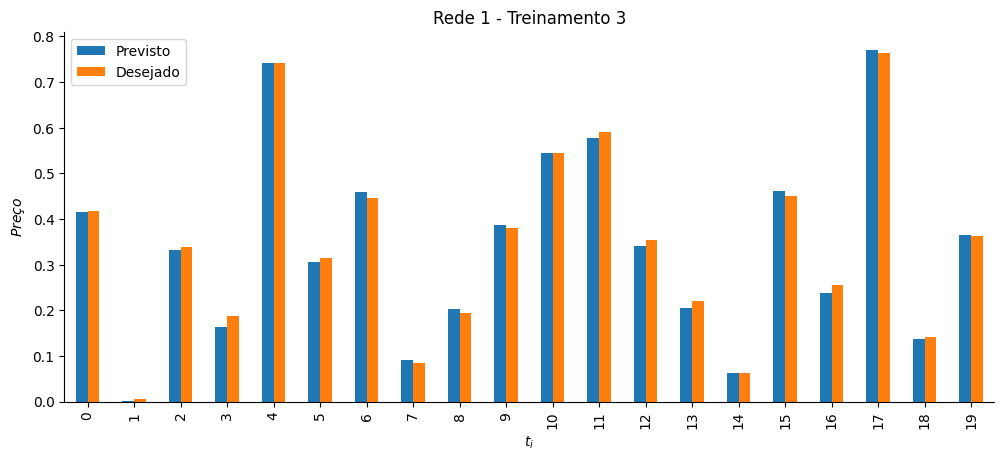

In [91]:
df_new[['T3R1', 'f(t)']].plot(kind='bar', figsize=(12, 4.8))
plt.legend(['Previsto', 'Desejado'])
sns.despine()
plt.xlabel(rf'$t_i$')
plt.ylabel(rf'$Preço$')
plt.title('Rede 1 - Treinamento 3')
plt.show()

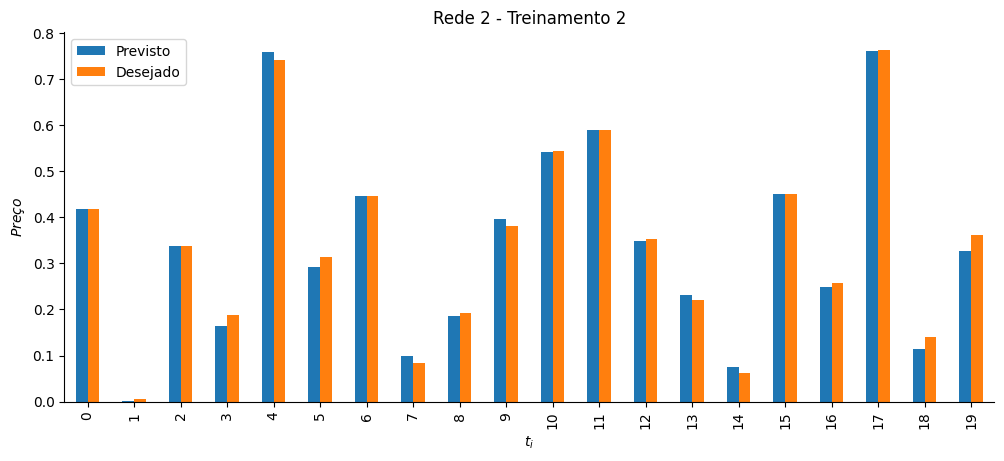

In [90]:
df_new[['T2R2', 'f(t)']].plot(kind='bar', figsize=(12, 4.8))
plt.legend(['Previsto', 'Desejado'])
sns.despine()
plt.xlabel(rf'$t_i$')
plt.ylabel(rf'$Preço$')
plt.title('Rede 2 - Treinamento 2')
plt.show()

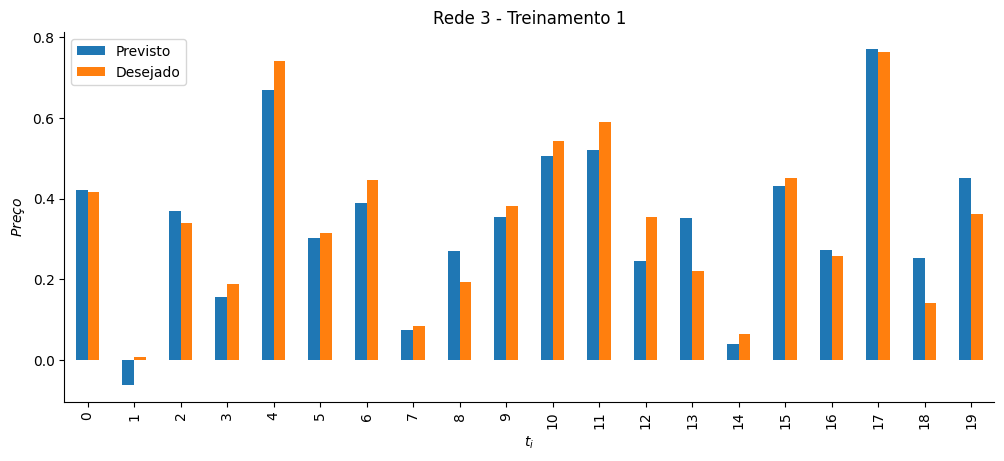

In [89]:
df_new[['T1R3', 'f(t)']].plot(kind='bar', figsize=(12, 4.8))
plt.legend(['Previsto', 'Desejado'])
sns.despine()
plt.xlabel(rf'$t_i$')
plt.ylabel(rf'$Preço$')
plt.title('Rede 3 - Treinamento 1')
plt.show()